In [123]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns


In [124]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [125]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

<Figure size 360x288 with 0 Axes>

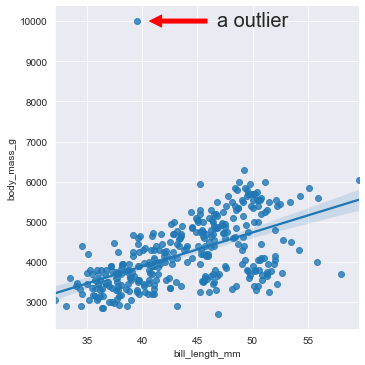

In [126]:
df.loc[1, ['body_mass_g']] = 10000
sns.set_style('darkgrid')
plt.figure(figsize=(5,4))
sns.lmplot(data=df, x='bill_length_mm', y='body_mass_g')

plt.annotate('a outlier', xy=(40, 10000), xytext=(50,10000),
             ha='center', va='center',
            arrowprops=dict(
                            color='red',
                           shrink=0.1), 
             fontsize=20)
plt.show()

<AxesSubplot:xlabel='bill_length_mm'>

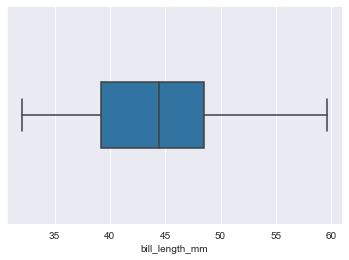

In [127]:
# X only
sns.boxplot(x=df.bill_length_mm, width=0.3)

<AxesSubplot:xlabel='body_mass_g'>

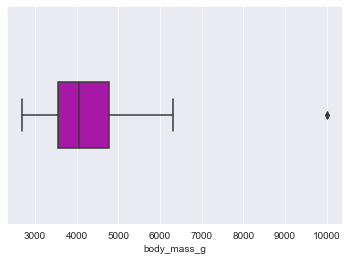

In [128]:
sns.boxplot(x=df.body_mass_g, width=0.3, color='m')

## Clean data first

In [129]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [130]:
# just drop easily
df.dropna(inplace=True)
df.isnull().sum()


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [131]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = df.bill_length_mm.to_list()
y = df.body_mass_g
print(type(x))
# print(x)

<class 'list'>


In [132]:
data = list(zip(x,y))
d_arr = scaler.fit_transform(data) # normalize to 0 - 1
# list(zip(x,y)) # very long zipped list

from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(
    eps = 0.23,
    metric='euclidean',
    min_samples=3,
    n_jobs=-1
)

clusters = outlier_detection.fit_predict(d_arr)
print(f'Outliers found: {list(clusters).count(-1)}')
# clusters

Outliers found: 1


In [133]:
df['cluster_body'] = clusters
df['outl_body'] = np.where(df.cluster_body == -1, True, False)
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster_body,outl_body
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,False
1,Adelie,Torgersen,39.5,17.4,186.0,10000.0,Female,-1,True
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,False


In [134]:
df.pivot_table(index='cluster_body', aggfunc='count',
              values='outl_body')

,outl_body
cluster_body,
-1,1
0,332


<AxesSubplot:title={'center':'With Outliers'}, xlabel='bill_length_mm', ylabel='body_mass_g'>

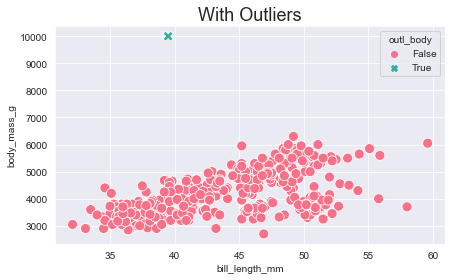

In [135]:
plt.figure(figsize=(7,4))
plt.title('With Outliers', fontsize=18)
sns.scatterplot(x=df.bill_length_mm,
               y=df.body_mass_g, 
               hue=df.outl_body, 
               s=100, palette='husl',
               style=df.outl_body)

In [136]:
df[df.outl_body == True]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster_body,outl_body
1,Adelie,Torgersen,39.5,17.4,186.0,10000.0,Female,-1,True


<AxesSubplot:title={'center':'No outliers now'}, xlabel='bill_length_mm', ylabel='body_mass_g'>

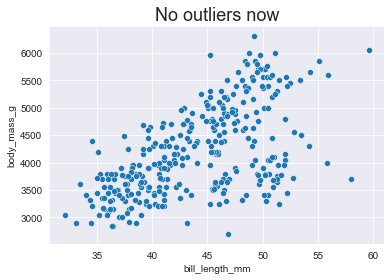

In [137]:
df = df[df.cluster_body > -1]
# cleaned multivariant outlier
plt.title('No outliers now', fontsize=18)

sns.scatterplot(x=df.bill_length_mm,
               y=df.body_mass_g)

## Adjust Params in BDScan

In [162]:
df.loc[1, 'body_mass_g'] = 1060
x = df.bill_length_mm.to_list()
y = df.body_mass_g
data = list(zip(x,y))
d_arr = scaler.fit_transform(data) # normalize to 0 - 1

fig = plt.figure(1)
k = 1
for i in range(1, 5 ):
    ep = i/5
    for min_samp in range(1, 5):
        outlier_detection = DBSCAN(
            eps = ep,
            metric='euclidean',
            min_samples= min_samp,
            n_jobs=-1
        )
        clusters = outlier_detection.fit_predict(d_arr)
#         print(f'Outliers found: {list(clusters).count(-1)}')
        ax = fig.add_subplot(1,1,k)
        
        df['clus'] = clusters
        sns.scatterplot(ax=ax,
                       x=df.bill_length_mm,
                       y=df.body_mass_g, 
                       hue=df.clus)
        
        k+=1
# clusters

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<Figure size 432x288 with 0 Axes>